# Monty Hall problem simulation

Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

Let's suppose arbitrary choices of doors (not specifically No. 1 and No. 2)

In [1]:
from random import randint, choice
import matplotlib.pyplot as plt

doors = ['A', 'B', 'C']
doors_len = len(doors)
doors_carpos = [0]*doors_len
doors_carpos[randint(0,doors_len-1)] = 1 # 3 doors with randomly placed car

doors_dict = {doors[i]: doors_carpos[i] for i in range(len(doors))}

doors_dict

{'A': 0, 'B': 1, 'C': 0}

Now the player randomly chooses one door

In [2]:
player_choice = choice(doors)
player_choice

'B'

The host reveals a goat

In [3]:
remaining_doors = [doors[i] for i in range(doors_len) if doors[i] != player_choice]

# now host randomly chooses which door with a goat to reveal
# first I have to find where are goats
remaining_doors_goats = [door for door in remaining_doors if doors_dict[door] == 0]
host_choice = choice(remaining_doors_goats)
host_choice

'C'

Now there are 2 options, either the player does not change his choice or he does. Let's explore both.

In [10]:
player_choice_no_change = player_choice
player_choice_change = choice([door for door in doors if door not in [player_choice, host_choice]])
player_choice_change

'A'

In [6]:
# check if player won the car or not
win_change = doors_dict[player_choice_change]
win_no_change = doors_dict[player_choice_no_change]

print("If player keeps the choice the same: ", bool(win_no_change))
print("If player changes the choice: ", bool(win_change))

If player keeps the choice the same:  True
If player changes the choice:  False


## Statistics

Now when I understand how the concept works, let's do the statistics!

In [124]:
%reset -f

In [125]:
from random import randint, choice, sample
import matplotlib.pyplot as plt


def create_doors_dict(doors, doors_len):
    
    doors_carpos = [0]*doors_len
    doors_carpos[randint(0,doors_len-1)] = 1 # 3 doors with randomly placed car

    doors_dict = {doors[i]: doors_carpos[i] for i in range(len(doors))}
#     print(doors_dict)
    return doors_dict

def make_player_choice(doors):
    return choice(doors)

def make_host_choice(doors, player_choice, doors_len, doors_dict, k=1):
    remaining_doors = [doors[i] for i in range(doors_len) if doors[i] != player_choice]

    # now host randomly chooses which door with a goat to reveal
    # first I have to find where are goats
    remaining_doors_goats = [door for door in remaining_doors if doors_dict[door] == 0]
#     print("remaining_doors_goats = ", remaining_doors_goats)
    host_choice = sample(remaining_doors_goats, k=k)
#     print(host_choice)
    return host_choice

In [126]:
def run_sim_choice_change(doors, doors_len, k=1):
    doors_dict = create_doors_dict(doors, doors_len)
    player_choice = make_player_choice(doors)
    host_choice = make_host_choice(doors, player_choice, doors_len, doors_dict, k)
    
    player_choice_change = choice([door for door in doors if door not in [player_choice] + host_choice])
#     print([player_choice] + host_choice)
    
#     print("player initial choice = ", player_choice)
#     print("host_choice = ", host_choice)
#     print("player choice = ", player_choice_change)
    return doors_dict[player_choice_change]

def run_sim_no_change(doors, doors_len, k=1):
    doors_dict = create_doors_dict(doors, doors_len)
    player_choice = make_player_choice(doors)
    host_choice = make_host_choice(doors, player_choice, doors_len, doors_dict, k)
    
#     print("host_choice = ", host_choice)
#     print("player choice = ", player_choice)
    return doors_dict[player_choice]

In [175]:
N = 10000

# doors = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I']
# doors_len = len(doors)
# k = 6 # number of revealed doors

N_doors = 10
doors_len = N_doors
doors = range(N_doors)
k = 8

result_no_change = [run_sim_no_change(doors, doors_len, k) for i in range(N)]
result_change = [run_sim_choice_change(doors, doors_len, k) for i in range(N)]

P_win_no_change = sum(result_no_change) / len(result_no_change)
P_win_change = sum(result_change) / len(result_change)

print(f"Chance to win if door choice is not changed = {P_win_no_change*100}%; theory says it should be {100/doors_len}%")
print(f"Chance to win if door choice is changed = {P_win_change*100}%; theory says it should be {100/doors_len * (doors_len-1)/(doors_len-k - 1)}%")



Chance to win if door choice is not changed = 10.549999999999999%; theory says it should be 10.0%
Chance to win if door choice is changed = 89.74%; theory says it should be 90.0%


Text(0.5, 1.0, 'N = 10')

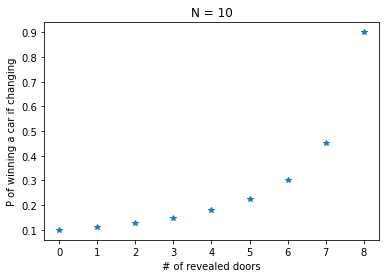

In [176]:
import numpy as np

x = np.array(range(N_doors-1))
plt.plot(x, 1/N_doors * (N_doors-1)/ (N_doors - x - 1), '*')
plt.xlabel('# of revealed doors')
plt.ylabel("P of winning a car if changing")
plt.title(f"N = {N_doors}")